In [2]:
!pip install pandas scikit-learn matplotlib seaborn

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.6 MB 2.4 MB/s eta 0:00:05
   --- ------------------------------------ 1.0/11.6 MB 2.5 MB/s eta 0:00:05
   ----- ---------------------------------- 1.6/11.6 MB 2.4 MB/s eta 0:00:05
   ------- -------------------------------- 2.1/11.6 MB 2.3 MB/s eta 0:00:05
   --------- ------------------------------ 2.6/11.6 MB 2.3 MB/s eta 0:00:04
   --------- ------------------------------ 2.9/11.6 MB 2.2 MB/s eta 0:00:05
   ----------- ---------------------------- 3.4/11.6 MB 2.1 MB/s eta 0:00:04
   ------------ --------------------------- 3.7/11.6 MB 2.1 MB/s eta 0:00:04
   ------------ --------------------------- 3.7/

In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
# ===== Đọc dữ liệu =====
df = pd.read_csv("../data/merge_price_sentiment/FPT_final_training_data.csv")
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

start_date = pd.to_datetime("2024-05-16")
df = df[df["Date"] >= start_date]

# ===== Loại bỏ các dòng không có nhãn =====
df = df.dropna(subset=["Target_Label"])

# ===== Chuyển sentiment về kiểu int =====
for col in ["positive", "neutral", "negative", "total_articles"]:
    df[col] = df[col].fillna(0).astype(int)

# ===== Loại bỏ nhãn 0 (giữ nguyên) nếu không muốn dự đoán =====
df = df[df["Target_Label"] != 0]

# ===== Tạo đặc trưng và nhãn =====
features = ["positive", "neutral", "negative", "total_articles"]
X = df[features]
y = df["Target_Label"]

# ===== Chia tập huấn luyện và kiểm tra =====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===== Huấn luyện mô hình Random Forest =====
model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
model.fit(X_train, y_train)

# ===== Dự đoán và đánh giá =====
y_pred = model.predict(X_test)

print("📋 Classification Report:")
print(classification_report(y_test, y_pred))


📋 Classification Report:
              precision    recall  f1-score   support

        -1.0       0.35      0.36      0.36        22
         1.0       0.36      0.35      0.36        23

    accuracy                           0.36        45
   macro avg       0.36      0.36      0.36        45
weighted avg       0.36      0.36      0.36        45



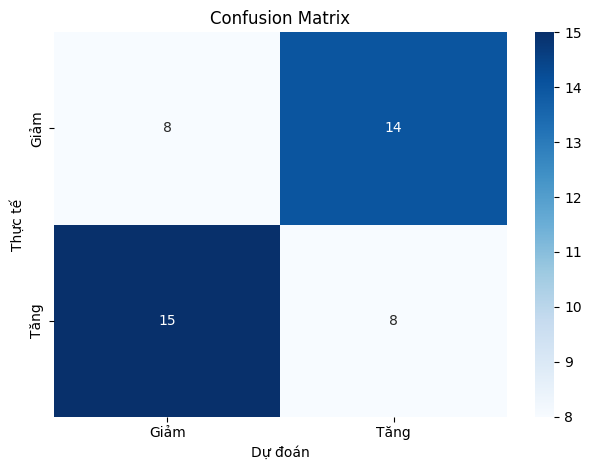

In [35]:
# Ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred, labels=[-1.0, 1.0])
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Giảm", "Tăng"], yticklabels=["Giảm", "Tăng"])
plt.title("Confusion Matrix")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.tight_layout()
plt.show()